In [20]:
import pandas as pd
import json
import requests as req
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import time

In [31]:
movie_df = pd.read_csv('movie_df.csv') #low_memory=False
movie_df = movie_df.head(25)

movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])


#movie_df = movie_df[movie_df["release_date"] > '2007']
print(movie_df)


del movie_df['budget']
del movie_df['Unnamed: 0']
del movie_df['vote_average']
del movie_df['vote_count']

movie_df = movie_df[movie_df.revenue != 0.0]      #CHANGE LATER


    Unnamed: 0                              belongs_to_collection    budget  \
0            0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1            1                                                NaN  65000000   
2            2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3            3                                                NaN  16000000   
4            4  {'id': 96871, 'name': 'Father of the Bride Col...         0   
5            5                                                NaN  60000000   
6            6                                                NaN  58000000   
7            7                                                NaN         0   
8            8                                                NaN  35000000   
9            9  {'id': 645, 'name': 'James Bond Collection', '...  58000000   
10          10                                                NaN  62000000   
11          11                                      

In [32]:
url = "http://www.omdbapi.com/?i="
rating_list = []
for ID in movie_df['imdb_id']:
    response = req.get(url+ID+"&apikey=trilogy")
    response = response.json()
    #response.keys()    
    #print(response['Title'])
    final_response = (response['Title'],
               response['imdbRating'],
               response['imdbVotes'])
    #print(final_response)
    rating_list.append(final_response)
    #time.sleep(5)

In [33]:
ratings = pd.DataFrame(rating_list, columns = ('title','rating','rating count'))

In [46]:
merge_df = pd.merge(movie_df, ratings, how = 'outer', on = 'title')
merge_df['genres']= merge_df['genres'].fillna("[{'name':''}]")
merge_df['genres']= merge_df['genres'].apply(lambda x:eval(x)[0]['name'])   #read up 

merge_df['rating'] = merge_df['rating'].astype('float')

merge_df

,belongs_to_collection,genres,id,imdb_id,original_language,overview,release_date,revenue,title,rating,rating count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",Animation,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,373554033.0,Toy Story,8.3,"695,930"
1,NaN,Adventure,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,Jumanji,6.9,"232,794"
2,NaN,Comedy,31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,81452156.0,Waiting to Exhale,5.7,"8,000"
3,"{'id': 96871, 'name': 'Father of the Bride Col...",Comedy,11862,tt0113041,en,Just when George Banks has recovered from his ...,1995-02-10,76578911.0,Father of the Bride Part II,5.9,"28,744"
4,NaN,Action,949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",1995-12-15,187436818.0,Heat,8.2,"470,084"
5,NaN,Action,9091,tt0114576,en,International action superstar Jean Claude Van...,1995-12-22,64350171.0,Sudden Death,5.7,"27,501"
6,"{'id': 645, 'name': 'James Bond Collection', '...",Adventure,710,tt0113189,en,James Bond must unmask the mysterious head of ...,1995-11-16,352194034.0,GoldenEye,7.2,"209,675"
7,NaN,Comedy,9087,tt0112346,en,"Widowed U.S. president Andrew Shepherd, one of...",1995-11-17,107879496.0,The American President,6.8,"45,347"
8,"{'id': 117693, 'name': 'Balto Collection', 'po...",Family,21032,tt0112453,en,An outcast half-wolf risks his life to prevent...,1995-12-22,11348324.0,Balto,7.1,"33,154"
9,NaN,History,10858,tt0113987,en,An all-star cast powers this epic look at Amer...,1995-12-22,13681765.0,Nixon,7.1,"25,450"


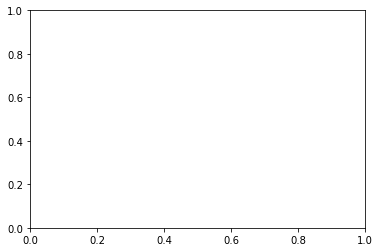

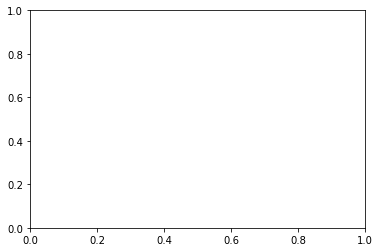

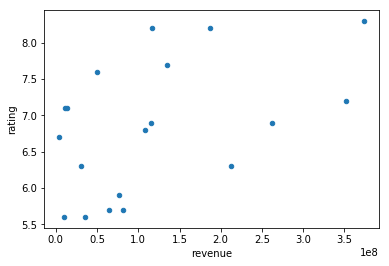

In [48]:
merge_df.plot(kind="scatter", x = 'revenue', y = 'rating')
plt.show()
